# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#cities2 = []
cities_weather = []
print('Beginning Data Retrieval')    
print('-----------------------------')
records = 0
sets = 1

for city in cities:
    records += 1
    print(f'Processing Record {records} of Set {sets} | {city}')
    if(records == 50):
        sets+=1
        records=0
    url = f'https://api.openweathermap.org/data/2.5/weather?units=imperial&q={city}&appid={weather_api_key}'
    response = requests.get(url).json()
    try:
        cities_weather.append({'City': city,
                            'Lat': response['coord']['lat'], 'Lon': response['coord']['lon'],
                               'Max Temp': response['main']['temp_max'], 'Humidity': response['main']['humidity'],
                               'Cloudiness': response['clouds']['all'], 'Wind Speed': response['wind']['speed'],
                                'Country': response['sys']['country'], 'Date': response['dt']})
    except:
        print('City not found. Skipping...')
        pass
    
print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | mathbaria
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | fengxian
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | srednekolymsk
Processing Record 6 of Set 1 | shellbrook
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 9 of Set 1 | hobyo
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | karla
Processing Record 13 of Set 1 | abong mbang
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | sorland
Processing Record 17 of Set 1 | saleaula
City not found. Skipping...
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | olinda
Processing Record 20 of Set 1 | turukhansk
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set

Processing Record 37 of Set 4 | ziarat
Processing Record 38 of Set 4 | tiksi
Processing Record 39 of Set 4 | kasangulu
Processing Record 40 of Set 4 | wanning
Processing Record 41 of Set 4 | samarai
Processing Record 42 of Set 4 | elbeuf
Processing Record 43 of Set 4 | bulawayo
Processing Record 44 of Set 4 | boa vista
Processing Record 45 of Set 4 | baruun-urt
Processing Record 46 of Set 4 | colchester
Processing Record 47 of Set 4 | tasiilaq
Processing Record 48 of Set 4 | maneadero
Processing Record 49 of Set 4 | college
Processing Record 50 of Set 4 | aurora
Processing Record 1 of Set 5 | evensk
Processing Record 2 of Set 5 | ilulissat
Processing Record 3 of Set 5 | chokurdakh
Processing Record 4 of Set 5 | tautira
Processing Record 5 of Set 5 | provideniya
Processing Record 6 of Set 5 | darab
Processing Record 7 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 5 | batemans bay
Processing Record 9 of Set 5 | dillon
Processing Record 10 of Set 5 | ulladu

Processing Record 28 of Set 8 | olafsvik
Processing Record 29 of Set 8 | lata
Processing Record 30 of Set 8 | kiama
Processing Record 31 of Set 8 | cururupu
Processing Record 32 of Set 8 | kota bahru
Processing Record 33 of Set 8 | ust-tsilma
Processing Record 34 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 35 of Set 8 | katsuura
Processing Record 36 of Set 8 | sao francisco
Processing Record 37 of Set 8 | nizhniy kuranakh
Processing Record 38 of Set 8 | samandag
Processing Record 39 of Set 8 | haines junction
Processing Record 40 of Set 8 | isilkul
Processing Record 41 of Set 8 | khatanga
Processing Record 42 of Set 8 | buala
Processing Record 43 of Set 8 | ishigaki
Processing Record 44 of Set 8 | keti bandar
Processing Record 45 of Set 8 | praya
Processing Record 46 of Set 8 | viligili
City not found. Skipping...
Processing Record 47 of Set 8 | kahului
Processing Record 48 of Set 8 | atar
Processing Record 49 of Set 8 | mae sot
Processing Record 50 of 

City not found. Skipping...
Processing Record 12 of Set 12 | hearst
Processing Record 13 of Set 12 | cherskiy
Processing Record 14 of Set 12 | huarmey
Processing Record 15 of Set 12 | papar
Processing Record 16 of Set 12 | hambantota
Processing Record 17 of Set 12 | puerto penasco
Processing Record 18 of Set 12 | malartic
Processing Record 19 of Set 12 | kathu
Processing Record 20 of Set 12 | miandrivazo
Processing Record 21 of Set 12 | fasa
Processing Record 22 of Set 12 | sechura
Processing Record 23 of Set 12 | port hardy
Processing Record 24 of Set 12 | huanuni
Processing Record 25 of Set 12 | acarau
Processing Record 26 of Set 12 | malm
Processing Record 27 of Set 12 | tidore
City not found. Skipping...
Processing Record 28 of Set 12 | teneguiban
City not found. Skipping...
Processing Record 29 of Set 12 | barcelona
Processing Record 30 of Set 12 | watsa
Processing Record 31 of Set 12 | upata
Processing Record 32 of Set 12 | abu dhabi
Processing Record 33 of Set 12 | volosovo
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
df = pd.DataFrame(cities_weather)
df.to_csv(output_data_file)
df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mathbaria,22.29,89.96,81.77,90,100,4.12,BD,1597097384
1,ushuaia,-54.80,-68.30,33.80,80,40,18.34,AR,1597097384
2,fengxian,34.70,116.59,75.90,94,23,3.67,CN,1597097384
3,saint george,37.10,-113.58,102.99,7,1,8.05,US,1597097253
4,srednekolymsk,67.45,153.68,46.44,63,59,7.38,RU,1597097385


In [19]:
df.count()                         

City          584
Lat           584
Lon           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [27]:
df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,5.840000e+02
mean,18.488955,20.066986,69.354846,71.905822,47.964041,8.221884,1.597097e+09
std,32.210101,89.442502,14.143529,20.522665,37.729566,7.526279,9.511590e+01
min,-54.800000,-175.200000,32.000000,3.000000,0.000000,0.380000,1.597097e+09
25%,-6.975000,-60.595000,59.000000,61.000000,6.000000,4.135000,1.597097e+09
50%,20.910000,25.625000,72.005000,77.000000,40.500000,6.930000,1.597097e+09
75%,44.802500,101.402500,78.800000,88.000000,85.000000,10.745000,1.597097e+09
max,78.220000,178.420000,109.000000,100.000000,100.000000,140.480000,1.597098e+09


In [32]:
#  Get the indices of cities that have humidity over 100%.
df.Humidity.loc[df.Humidity>100]

Series([], Name: Humidity, dtype: int64)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [34]:
df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mathbaria,22.29,89.96,81.77,90,100,4.12,BD,1597097384
1,ushuaia,-54.80,-68.30,33.80,80,40,18.34,AR,1597097384
2,fengxian,34.70,116.59,75.90,94,23,3.67,CN,1597097384
3,saint george,37.10,-113.58,102.99,7,1,8.05,US,1597097253
4,srednekolymsk,67.45,153.68,46.44,63,59,7.38,RU,1597097385


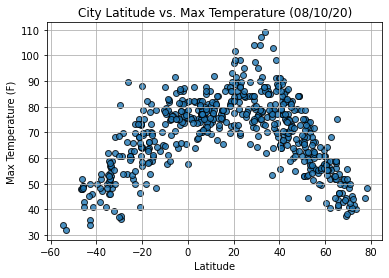

In [42]:
plt.scatter(df["Lat"],df['Max Temp'], edgecolors='black', alpha=0.8)
plt.title('City Latitude vs. Max Temperature (%s)'% time.strftime('%x') ) 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('Fig1.png')
plt.show()

## Latitude vs. Humidity Plot

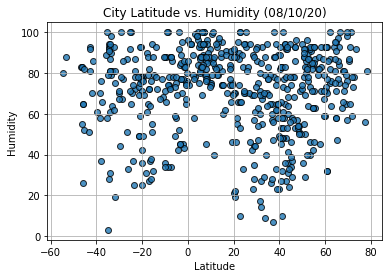

In [52]:
plt.scatter(df["Lat"],df['Humidity'], edgecolors='black', alpha=0.8)
plt.title('City Latitude vs. Humidity (%s)'% time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig('Fig2.png')
plt.show()

## Latitude vs. Cloudiness Plot

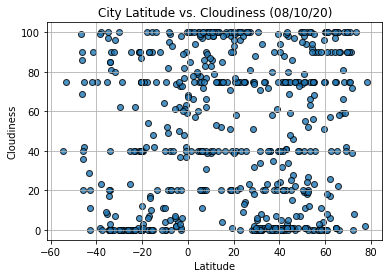

In [51]:
plt.scatter(df["Lat"],df['Cloudiness'], edgecolors='black', alpha=0.8)
plt.title('City Latitude vs. Cloudiness (%s)'% time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig('Fig3.png')
plt.show()

## Latitude vs. Wind Speed Plot

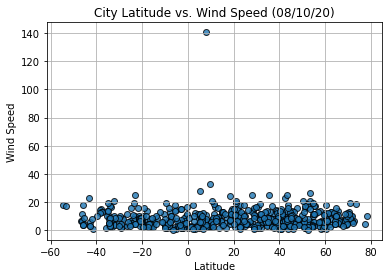

In [50]:
plt.scatter(df["Lat"],df['Wind Speed'], edgecolors='black', alpha=0.8)
plt.title('City Latitude vs. Wind Speed (%s)'% time.strftime('%x') ) 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig('Fig4.png')
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x,y,title,coordinates):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
    regressvalue = x * slope + intercept
    msg ='Y = '+ str(round(slope,2))+'X + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regressvalue)
    
    

In [48]:
# Create Northern and Southern Hemisphere DataFrames

northern = df.loc[df['Lat'] >= 0.0]
northern


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mathbaria,22.29,89.96,81.77,90,100,4.12,BD,1597097384
2,fengxian,34.70,116.59,75.90,94,23,3.67,CN,1597097384
3,saint george,37.10,-113.58,102.99,7,1,8.05,US,1597097253
4,srednekolymsk,67.45,153.68,46.44,63,59,7.38,RU,1597097385
5,shellbrook,53.22,-106.40,71.60,46,75,20.80,CA,1597097385
...,...,...,...,...,...,...,...,...,...
575,goderich,43.75,-81.72,87.01,64,34,16.20,CA,1597097261
577,san policarpo,12.18,125.51,81.18,82,53,6.98,PH,1597097541
579,qaqortoq,60.72,-46.03,55.40,32,8,6.93,GL,1597097542
581,fairbanks,64.84,-147.72,59.00,58,1,10.29,US,1597097494


In [49]:
southern = df.loc[df['Lat'] < 0.0]
southern

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,ushuaia,-54.80,-68.30,33.80,80,40,18.34,AR,1597097384
6,hermanus,-34.42,19.23,46.00,94,0,9.89,ZA,1597097160
8,rikitea,-23.12,-134.97,69.93,72,62,24.94,PF,1597097157
9,port alfred,-33.59,26.89,56.25,79,0,6.04,ZA,1597097160
12,bredasdorp,-34.53,20.04,50.00,93,0,3.36,ZA,1597097387
...,...,...,...,...,...,...,...,...,...
574,caledon,-34.23,19.43,46.00,94,0,3.15,ZA,1597097541
576,flinders,-34.58,150.86,53.01,91,20,5.26,AU,1597097541
578,rantepao,-2.97,119.90,65.70,89,20,1.68,ID,1597097542
580,taltal,-25.40,-70.48,59.18,71,23,3.22,CL,1597097542


In [ ]:
nh = linear_regression(northern['Lat'], northern['Max Temp'])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


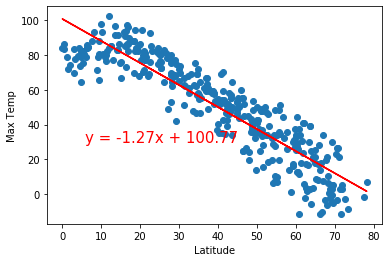

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


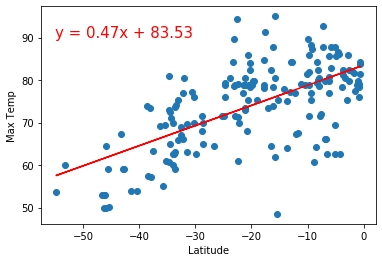

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


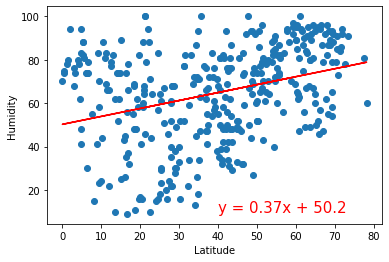

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


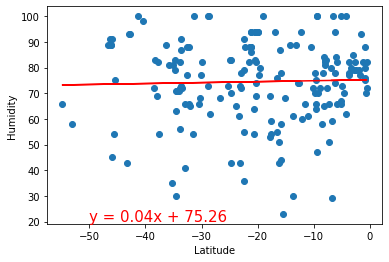

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


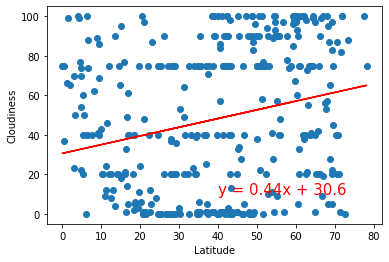

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


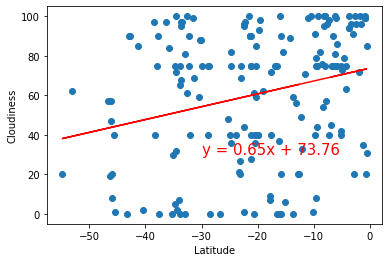

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


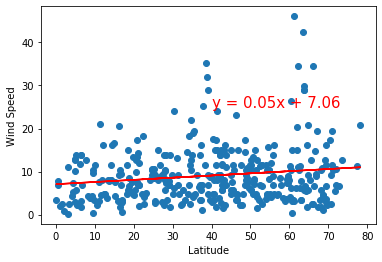

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


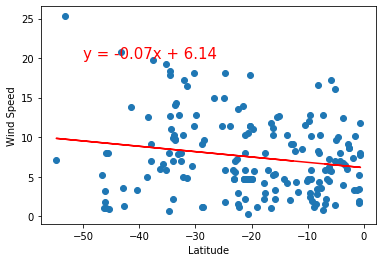